In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Unzip dataset.zip into drive CNN folder
!unzip '/content/drive/MyDrive/Copy of Food Classification dataset.zip' -d '/content/drive/MyDrive/CNN'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/CNN/idli/277.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/278.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/280.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/282.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/283.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/284.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/285.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/286.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/287.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/288.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/290.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/292.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/293.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/295.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/296.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/297.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/299.jpg  
  inflating: /

In [ ]:
# Splitting data into train test

import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Set the path to your main CNN folder
source_folder = '/content/drive/MyDrive/CNN'
train_folder = os.path.join(source_folder, 'train')
test_folder = os.path.join(source_folder, 'test')

from sklearn.model_selection import train_test_split

for subfolder in os.listdir(source_folder):
    subfolder_path = os.path.join(source_folder, subfolder)

    if os.path.isdir(subfolder_path) and subfolder not in ['train', 'test']:
        images = os.listdir(subfolder_path)
        train_images, test_images = train_test_split(images, train_size=0.8, random_state=42)

        os.makedirs(os.path.join(train_folder, subfolder), exist_ok=True)
        os.makedirs(os.path.join(test_folder, subfolder), exist_ok=True)

        for image in train_images:
            src_path = os.path.join(subfolder_path, image)
            dst_path = os.path.join(train_folder, subfolder, image)
            shutil.copy(src_path, dst_path)

        for image in test_images:
            src_path = os.path.join(subfolder_path, image)
            dst_path = os.path.join(test_folder, subfolder, image)
            shutil.copy(src_path, dst_path)

print("Data has been split into training and test folders.")

Data has been split into training and test folders.


IMPORTING PACKAGES

In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout

INITITALISING CNN

In [ ]:
# Creating Convolutional Base
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(1024, activation='relu'))
model.add(Dense(34, activation='softmax'))

In [ ]:
# Complile CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 34)                  │          34,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,451,490 (9.35 MB)

 Trainable params: 2,451,490 (9.35 MB)

 Non-trainable params: 0 (0.00 B)

GENERATING AUGMENTED DATA

In [ ]:
# Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range = 0.3,
    horizontal_flip = True,
    zoom_range = 0.3
)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
    directory = train_folder,
    target_size= (64, 64),
    batch_size = 128,
    class_mode= 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory = test_folder,
    target_size= (64, 64),
    batch_size = 32,
    class_mode= 'categorical'
)

Found 19092 images belonging to 34 classes.
Found 4781 images belonging to 34 classes.


In [ ]:
train_generator.class_indices

{'Baked Potato': 0,
 'Crispy Chicken': 1,
 'Donut': 2,
 'Fries': 3,
 'Hot Dog': 4,
 'Sandwich': 5,
 'Taco': 6,
 'Taquito': 7,
 'apple_pie': 8,
 'burger': 9,
 'butter_naan': 10,
 'chai': 11,
 'chapati': 12,
 'cheesecake': 13,
 'chicken_curry': 14,
 'chole_bhature': 15,
 'dal_makhani': 16,
 'dhokla': 17,
 'fried_rice': 18,
 'ice_cream': 19,
 'idli': 20,
 'jalebi': 21,
 'kaathi_rolls': 22,
 'kadai_paneer': 23,
 'kulfi': 24,
 'masala_dosa': 25,
 'momos': 26,
 'omelette': 27,
 'paani_puri': 28,
 'pakode': 29,
 'pav_bhaji': 30,
 'pizza': 31,
 'samosa': 32,
 'sushi': 33}

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14075960313753337283
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8879602368382916856
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
with tf.device('/GPU:0'):
  model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
  )

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.5382 - loss: 1.5317 - val_accuracy: 0.4328 - val_loss: 1.9825
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.5585 - loss: 1.4657 - val_accuracy: 0.4369 - val_loss: 2.0277
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.5885 - loss: 1.3799 - val_accuracy: 0.4192 - val_loss: 2.1855
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.5911 - loss: 1.3344 - val_accuracy: 0.4480 - val_loss: 2.0198
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.6192 - loss: 1.2643 - val_accuracy: 0.4229 - val_loss: 2.1110
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.6186 - loss: 1.2266 - val_accuracy: 0.4259 - val_loss: 2.1752
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.6407 - loss: 1.1752 - val_accuracy: 0.4505 - val_loss: 2.0871
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.6589 - loss: 1.1088 - val_accu

In [ ]:
model.save('/content/drive/MyDrive/CNN/model.h5')

TESTING OUTPUT

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def model_output(path):
    # Load and preprocess the image
    raw_img = image.load_img(path, target_size=(64, 64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255.0

    # Predict and find the class with the highest probability
    predictions = model.predict(raw_img)
    class_index = np.argmax(predictions)
    class_name = list(train_generator.class_indices.keys())
    probability = predictions[0][class_index]
    plt.imshow(cv2.imread(path))
    plt.axis('off')
    plt.show()

    # Print the prediction and probability
    print(f"Predicted Class: {class_name}")
    print(f"Probability: {probability:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


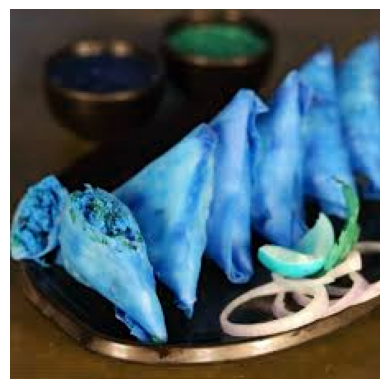

Predicted Class: ['Baked Potato', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Sandwich', 'Taco', 'Taquito', 'apple_pie', 'burger', 'butter_naan', 'chai', 'chapati', 'cheesecake', 'chicken_curry', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'ice_cream', 'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'omelette', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa', 'sushi']
Probability: 0.33


In [ ]:
model_output('/content/samosa.jpg')

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

 58/150 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.4167 - loss: 2.3950

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 245ms/step - accuracy: 0.4229 - loss: 2.3841
Test Accuracy: 42.61%
